In [686]:
#importamos librerias
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

## Mejoramiento de Dataset

Se quiere agregar amenities al dataset final obtenido en el TP1 que esperamos mejore la predicción del modelo. Para esto se carga de nuevo el dataset original para extraer la información

In [687]:
data = pd.read_csv('properatti.csv')
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [688]:
data['description']=data['description'].apply(lambda x : str.lower(str(x)))
data['title']=data['title'].apply(lambda x : str.lower(str(x)))

In [689]:
def extraer_amenities(texto,regex):

    regex_amenities = regex
    #print(regex_amenities)
    if (re.search(regex_amenities, texto)):
        return 1
    else:
        return 0


In [690]:
amenities_grouped=['pileta|piscina','gimnasio|gym','terraza','balc[oó]n','cochera|garage|coch','jard[ií]n','patio','parrilla','quincho','l[ao]undry','sum|s u m|s.u.m.','grupo electr[oó]geno','solarium']
for amenitie in amenities_grouped:

    data[amenitie] = data['description'].fillna('') + ' ' + data['title'].fillna('')
    data[amenitie] = data[amenitie].apply(lambda x : extraer_amenities(x,amenitie))
    print(amenitie,': ',sum(data[amenitie]))

pileta|piscina :  32877
gimnasio|gym :  9320
terraza :  27701
balc[oó]n :  43419
cochera|garage|coch :  52723
jard[ií]n :  17612
patio :  21664
parrilla :  34095
quincho :  13138
l[ao]undry :  7341
sum|s u m|s.u.m. :  15925
grupo electr[oó]geno :  1497
solarium :  10046


Se ven muchas amenities distintas en varias propiedades, se cambian el nombre de las columnas por un nombre más claro.

In [691]:
amenities_grouped_clean=['pileta','gimnasio','terraza','balcón','cochera','jardín','patio','parrilla','quincho','laundry','sum','grupo electrógeno','solarium']
amenities=pd.DataFrame()
amenities[amenities_grouped_clean]=data[amenities_grouped]
amenities

,pileta,gimnasio,terraza,balcón,cochera,jardín,patio,parrilla,quincho,laundry,sum,grupo electrógeno,solarium
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,1,0,1,1,1,0,0,1,1,0,0,0,0
121216,1,0,0,0,1,1,0,1,1,0,0,0,0
121217,0,0,1,1,1,0,0,1,0,1,0,1,1
121218,0,0,0,0,0,0,0,0,0,0,0,0,0


In [692]:
data = pd.read_csv('DatasetFinal.csv')
data.index=data['Unnamed: 0'].values  
data=data.join(amenities)
data.drop('Unnamed: 0',inplace=True,axis=1)
data.reset_index(drop=True,inplace=True)

In [693]:
data2 = pd.read_csv('DatasetFinal.csv')
data2.drop('Unnamed: 0',inplace=True,axis=1)
data2

,property_type,state_name,price_aprox_usd,rooms,latitude,longitude,Place,Sup_filled
0,PH,Capital Federal,62000.0,1.0,-34.661824,-58.508839,Mataderos,40.0
1,apartment,Capital Federal,72000.0,1.0,-34.652262,-58.522982,Mataderos,55.0
2,apartment,Buenos Aires Costa Atlántica,64000.0,1.0,-38.002626,-57.549447,Mar del Plata,35.0
3,PH,Bs.As. G.B.A. Zona Norte,130000.0,2.0,-34.532957,-58.521782,Vicente López,78.0
4,apartment,Capital Federal,138000.0,0.0,-34.559873,-58.443362,Belgrano,40.0
...,...,...,...,...,...,...,...,...
75813,apartment,Córdoba,84518.1,2.0,-32.000000,-64.000000,Río Tercero,50.0
75814,apartment,Capital Federal,410000.0,3.0,-34.563685,-58.442683,Belgrano,157.0
75815,apartment,Capital Federal,870000.0,2.0,-34.562700,-58.458290,Belgrano,93.0
75816,house,Bs.As. G.B.A. Zona Norte,498000.0,3.0,-34.463120,-58.534810,San Isidro,360.0


In [694]:
for amenitie in amenities_grouped_clean:

    print(amenitie,': ',sum(data[amenitie]))

pileta :  21484
gimnasio :  6335
terraza :  19246
balcón :  30672
cochera :  35040
jardín :  11715
patio :  14104
parrilla :  24022
quincho :  7905
laundry :  5767
sum :  11649
grupo electrógeno :  1123
solarium :  7375


In [695]:
data.value_counts()

property_type  state_name                price_aprox_usd  rooms  latitude    longitude   Place               Sup_filled  pileta  gimnasio  terraza  balcón  cochera  jardín  patio  parrilla  quincho  laundry  sum  grupo electrógeno  solarium
apartment      Capital Federal           37000.00         1.0    -34.633330  -58.416670  Boedo               30.0        1       0         0        0       0        0       0      1         0        1        1    0                  1           46
                                         40000.00         1.0    -34.633330  -58.416670  Boedo               30.0        1       0         0        0       0        0       0      1         0        1        1    0                  1           20
               Bs.As. G.B.A. Zona Sur    81576.00         1.0    -34.666670  -58.333330  Avellaneda          42.0        1       1         1        1       1        0       0      1         0        0        1    0                  1           20
               Bs.

## Filtrado de variables

Se calcula el precio por metro cuadrado en dolares que es la variable target que se debe estimar

In [696]:
data['USD/m2']=data['price_aprox_usd']/data['Sup_filled']

In [697]:
data.describe()

,price_aprox_usd,rooms,latitude,longitude,Sup_filled,pileta,gimnasio,terraza,balcón,cochera,jardín,patio,parrilla,quincho,laundry,sum,grupo electrógeno,solarium,USD/m2
count,7.581800e+04,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,2.333260e+05,2.372722,-34.544017,-59.204462,125.189589,0.283363,0.083555,0.253845,0.404548,0.462159,0.154515,0.186024,0.316838,0.104263,0.076064,0.153644,0.014812,0.097272,2.994064e+03
std,3.430064e+05,1.296279,1.807757,2.168739,1060.370769,0.450634,0.276722,0.435213,0.490808,0.498569,0.361444,0.389129,0.465247,0.305603,0.265102,0.360610,0.120800,0.296330,1.701188e+04
min,4.666620e+03,0.000000,-54.819736,-72.276820,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,9.000000e+04,1.000000,-34.651420,-58.693606,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.422018e+03
50%,1.450000e+05,2.000000,-34.588889,-58.485720,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.969697e+03
75%,2.605430e+05,3.000000,-34.432382,-58.403254,140.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.723404e+03
max,4.654544e+07,8.000000,-23.000000,-54.343870,200000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.600000e+06


Para las variables continuas superficie y precio por metro cuadrado se ve que presentan mucha dispersion por lo que se sacan los outliers.

In [698]:
data_filtrado=data

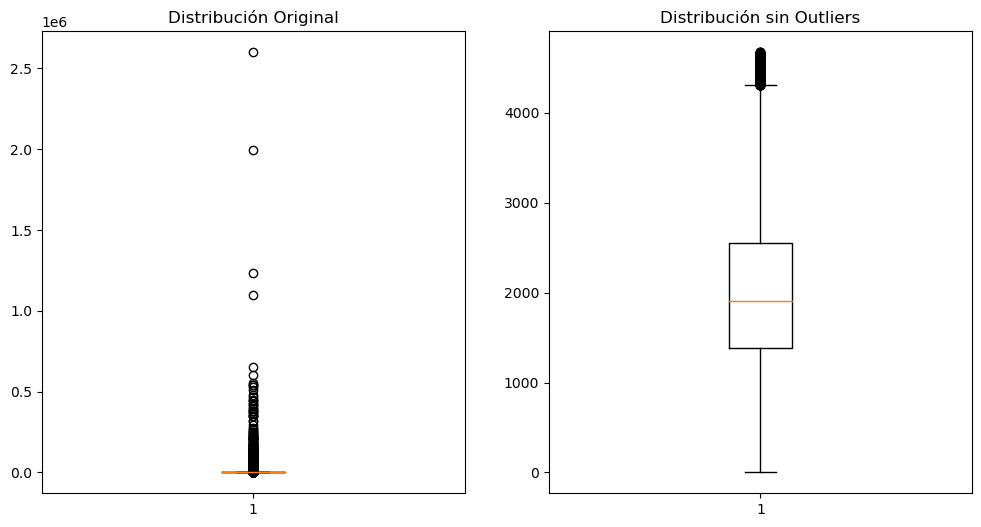

In [699]:

columna_filtered = 'USD/m2'

# Calcular el rango intercuartílico (IQR)
Q1 = data[columna_filtered].quantile(0.25)
Q3 = data[columna_filtered].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


data_filtrado = data_filtrado[(data_filtrado[columna_filtered] >= limite_inferior) & (data_filtrado[columna_filtered] <= limite_superior)]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data[columna_filtered])
plt.title('Distribución Original')

plt.subplot(1, 2, 2)
plt.boxplot(data_filtrado[columna_filtered])
plt.title('Distribución sin Outliers')

plt.show()

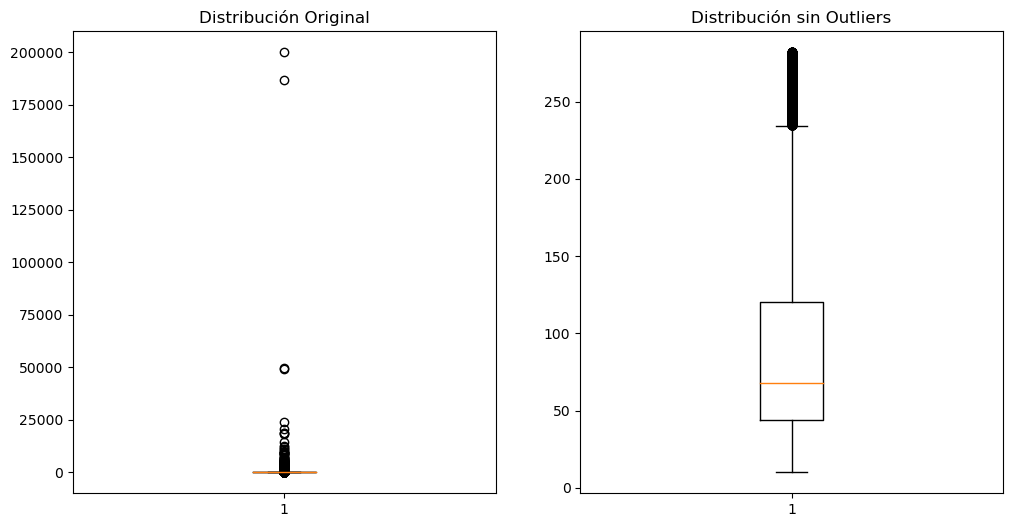

In [700]:

columna_filtered = 'Sup_filled'

# Calcular el rango intercuartílico (IQR)
Q1 = data[columna_filtered].quantile(0.25)
Q3 = data[columna_filtered].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


data_filtrado = data_filtrado[(data_filtrado[columna_filtered] >= limite_inferior) & (data_filtrado[columna_filtered] <= limite_superior)]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data[columna_filtered])
plt.title('Distribución Original')

plt.subplot(1, 2, 2)
plt.boxplot(data_filtrado[columna_filtered])
plt.title('Distribución sin Outliers')

plt.show()

In [701]:
data=data_filtrado
data.reset_index(drop=True,inplace=True)

## Dummies de columnas categóricas

Se considera property_type y region como columnas categóricas

In [702]:
#analizando la distribución de las columnas categóricas
categories = ['property_type','state_name','Place']
for category in categories:
    print()
    print(category)
    print(len(data[category].unique()))



property_type
4

state_name
28

Place
394


### Creando dummies para property_type

Solo Tiene 4 posibilidades por lo que se mantienen todas ellas

In [703]:
enc_property = OneHotEncoder(drop='first') 
X = data[['property_type']]
enc_property.fit(X)
print(enc_property.categories_)
column_names_property = enc_property.get_feature_names(['property_type'])
column_names_property

[array(['PH', 'apartment', 'house', 'store'], dtype=object)]


array(['property_type_apartment', 'property_type_house',
       'property_type_store'], dtype=object)

In [704]:
X.value_counts()

property_type
apartment        43787
house            18257
PH                3999
store              230
dtype: int64

In [705]:
dummies_prop = enc_property.transform(X).toarray()
dummies_prop_df = pd.DataFrame(dummies_prop)
dummies_prop_df.columns = column_names_property
dummies_prop_df

,property_type_apartment,property_type_house,property_type_store
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
66268,1.0,0.0,0.0
66269,1.0,0.0,0.0
66270,1.0,0.0,0.0
66271,1.0,0.0,0.0


### Creando dummies para state_name

In [706]:
data.state_name.value_counts()

Capital Federal                 21678
Bs.As. G.B.A. Zona Norte        14194
Buenos Aires Costa Atlántica     6769
Bs.As. G.B.A. Zona Sur           6043
Bs.As. G.B.A. Zona Oeste         5298
Córdoba                          5186
Santa Fe                         4012
Buenos Aires Interior            1219
Corrientes                        361
Mendoza                           310
Río Negro                         246
Neuquén                           243
Misiones                          195
San Luis                          104
Tucumán                           103
Chubut                             90
Entre Ríos                         77
Salta                              66
Tierra Del Fuego                   24
Chaco                              14
La Pampa                           12
Santa Cruz                          9
Jujuy                               6
Catamarca                           4
Formosa                             4
San Juan                            3
Santiago Del

En la columna state_name se tienen 28 categorías, que se consideran demasiadas para pasar a dummies por lo que se considera mejor hacer una agrupación

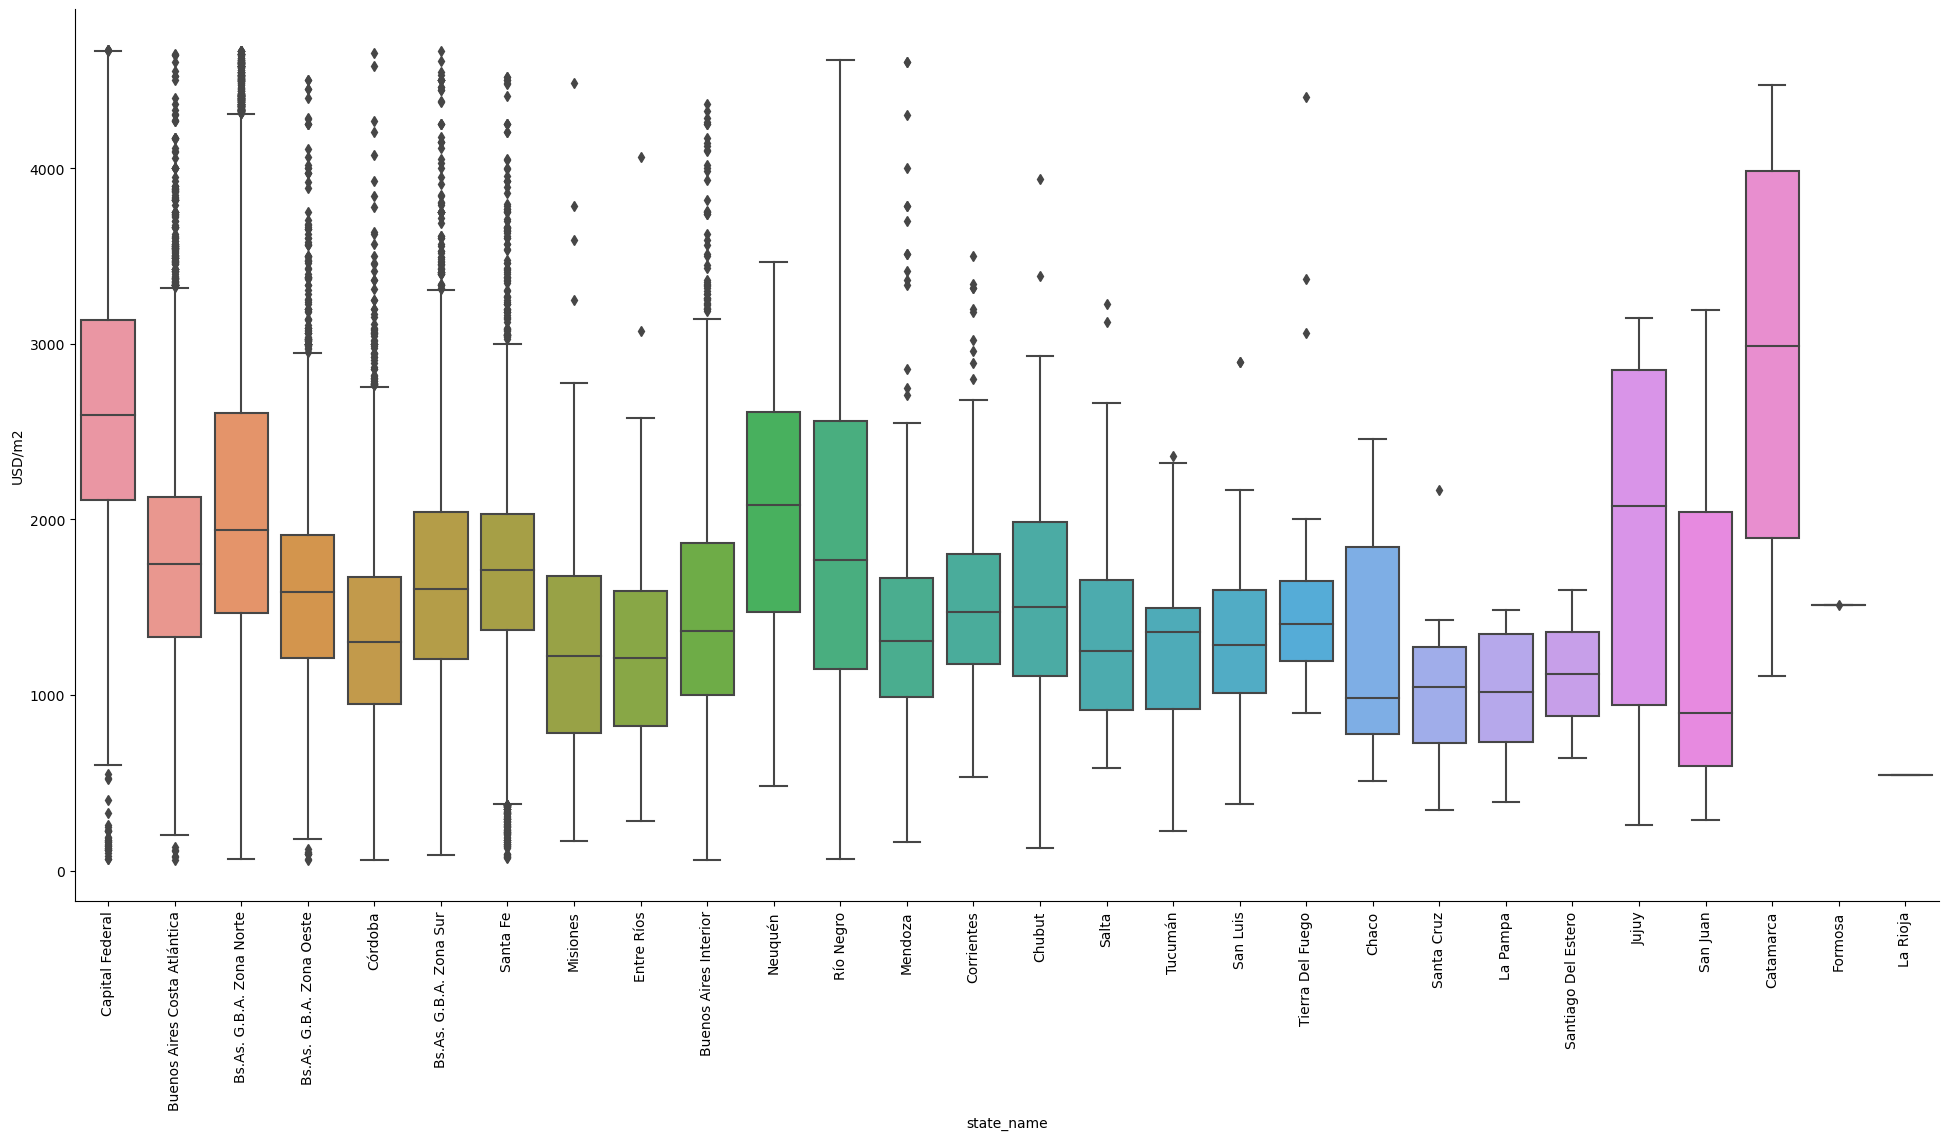

In [707]:

g=sns.catplot(x = "state_name", y = "USD/m2", data=data, kind="box")
g.fig.set_size_inches(25,10)
g.set_xticklabels(rotation=90)


Se deciden hacer 3 regiones basados en la ditribución que se ve en el gráfico

In [708]:
regiones_argentinas = {    
    'Capital Federal': 'Region 1',
    'Catamarca': 'Region 1',
    'Bs.As. G.B.A. Zona Norte': 'Region 2',
    'Buenos Aires Costa Atlántica': 'Region 2',
    'Neuquén': 'Region 2',
    'Río Negro': 'Region 2',
    'Jujuy': 'Region 2',
    'La Rioja': 'Region 3',
    'Bs.As. G.B.A. Zona Oeste': 'Region 3',
    'Bs.As. G.B.A. Zona Sur': 'Region 3',
    'Buenos Aires Interior': 'Region 3',
    'Chaco': 'Region 3',
    'Chubut': 'Region 3',
    'Córdoba': 'Region 3',
    'Corrientes': 'Region 3',
    'Entre Ríos': 'Region 3',
    'Formosa': 'Region 3',
    'La Pampa': 'Region 3',
    'Mendoza': 'Region 3',
    'Misiones': 'Region 3',
    'Salta': 'Region 3',
    'San Juan': 'Region 3',
    'San Luis': 'Region 3',
    'Santa Cruz': 'Region 3',
    'Santa Fe': 'Region 3',
    'Santiago del Estero': 'Region 3',
    'Tierra del Fuego': 'Region 3',
    'Tucumán': 'Region 3'}
data['region'] = data['state_name'].map(regiones_argentinas)

In [709]:
data['region'].value_counts()

Region 3    23107
Region 1    21682
Region 2    21458
Name: region, dtype: int64

In [710]:
dummies_region=pd.get_dummies(data['region'],drop_first=True)
dummies_region

,Region 2,Region 3
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
66268,0,1
66269,0,1
66270,0,1
66271,0,0


La variable Place presenta demasiadas categorías, se decide no utilizarlas a menos que sea necesario si se consiedera que el modelo no predice correctamente

## Normalizando las columnas cuantitativas

Sup_filled es la única variables continua a normalizar, no así rooms que es discreta 


In [711]:
continuas = ['Sup_filled']
X = data[continuas]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


std = pd.DataFrame(X_std)

column_names_continuas = [continua + '_std' for continua in continuas]
std.columns = column_names_continuas
std


,Sup_filled_std
0,-0.817925
1,-0.576257
2,-0.898481
3,-0.205700
4,-0.817925
...,...
66268,-0.656813
66269,-0.656813
66270,-0.656813
66271,1.067082


Concatenamos todos los df en un nuevo df y descartamos las variables que no se utilizarán



In [712]:
#por el momento no incluimos place
df = pd.concat([data, std, dummies_region, dummies_prop_df], axis=1)


In [713]:
df

,property_type,state_name,price_aprox_usd,rooms,latitude,longitude,Place,Sup_filled,pileta,gimnasio,...,grupo electrógeno,solarium,USD/m2,region,Sup_filled_std,Region 2,Region 3,property_type_apartment,property_type_house,property_type_store
0,PH,Capital Federal,62000.00,1.0,-34.661824,-58.508839,Mataderos,40.0,0,0,...,0,0,1550.000000,Region 1,-0.817925,0,0,0.0,0.0,0.0
1,apartment,Capital Federal,72000.00,1.0,-34.652262,-58.522982,Mataderos,55.0,0,0,...,0,0,1309.090909,Region 1,-0.576257,0,0,1.0,0.0,0.0
2,apartment,Buenos Aires Costa Atlántica,64000.00,1.0,-38.002626,-57.549447,Mar del Plata,35.0,0,0,...,0,0,1828.571429,Region 2,-0.898481,1,0,1.0,0.0,0.0
3,PH,Bs.As. G.B.A. Zona Norte,130000.00,2.0,-34.532957,-58.521782,Vicente López,78.0,0,0,...,0,0,1666.666667,Region 2,-0.205700,1,0,0.0,0.0,0.0
4,apartment,Capital Federal,138000.00,0.0,-34.559873,-58.443362,Belgrano,40.0,1,0,...,0,1,3450.000000,Region 1,-0.817925,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66268,apartment,Córdoba,84237.68,2.0,-32.000000,-64.000000,Río Tercero,50.0,0,0,...,0,1,1684.753600,Region 3,-0.656813,0,1,1.0,0.0,0.0
66269,apartment,Córdoba,84518.10,2.0,-32.000000,-64.000000,Río Tercero,50.0,0,0,...,0,1,1690.362000,Region 3,-0.656813,0,1,1.0,0.0,0.0
66270,apartment,Córdoba,84518.10,2.0,-32.000000,-64.000000,Río Tercero,50.0,0,0,...,0,1,1690.362000,Region 3,-0.656813,0,1,1.0,0.0,0.0
66271,apartment,Capital Federal,410000.00,3.0,-34.563685,-58.442683,Belgrano,157.0,0,0,...,0,0,2611.464968,Region 1,1.067082,0,0,1.0,0.0,0.0


Para comodidad se lleva a la ultima columna la variable target

In [714]:
aux=df['USD/m2']
df.drop(axis=1,inplace=True,columns='USD/m2')
df['USD/m2']=aux

## Analisis de correlaciones entre variables 



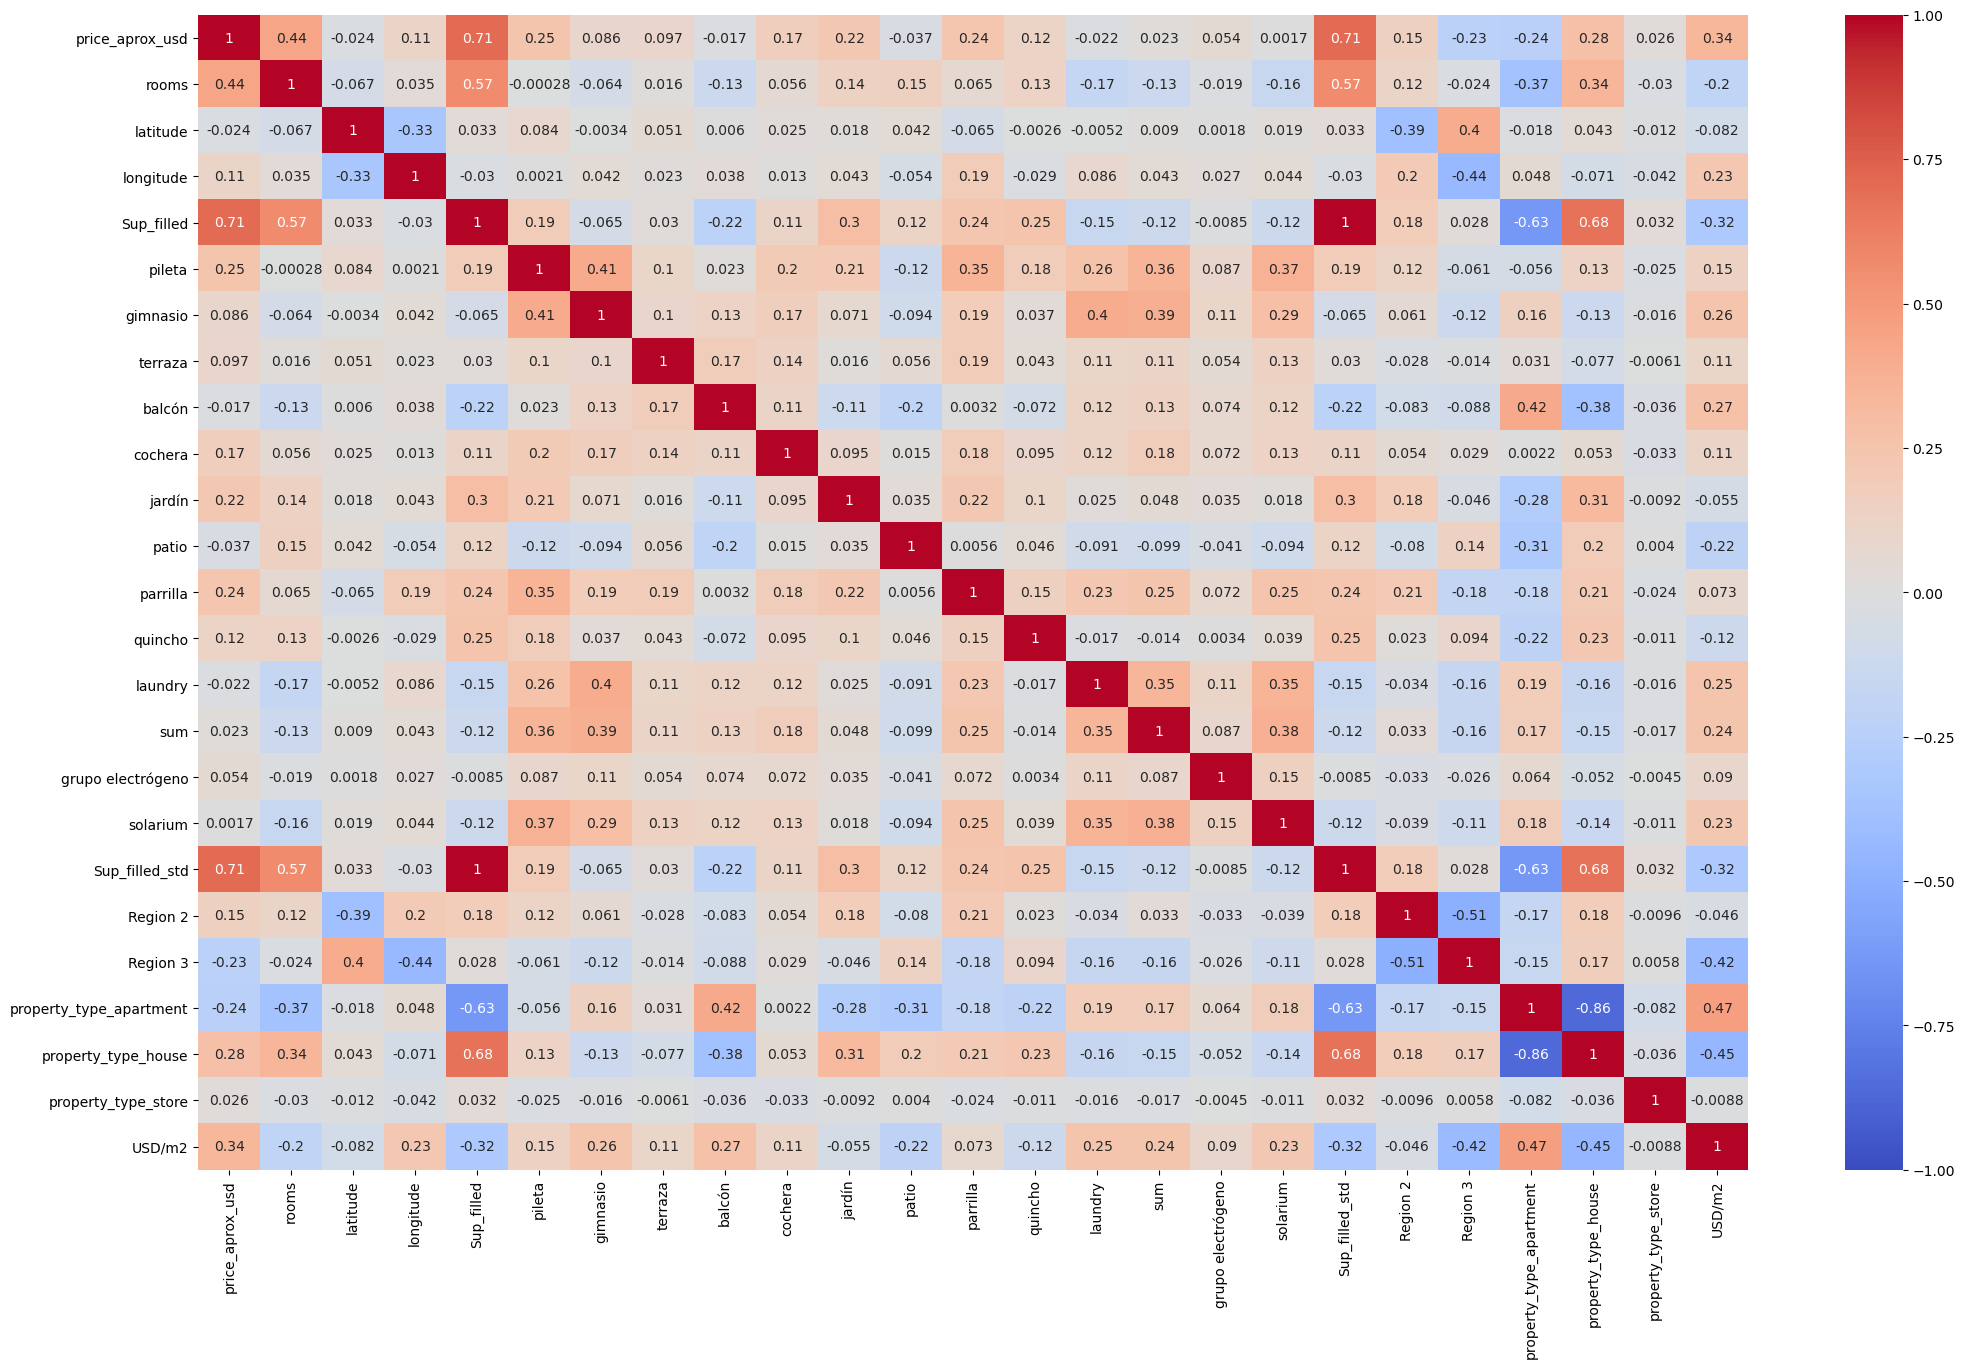

In [715]:
g=sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0, annot=True, cmap="coolwarm")
g.figure.set_size_inches(25,15)

A partir de este análisis se desprenden ciertas cuestiones
* longitude, si bien presenta una relación con la variable, por lo que representa no la consideraremos para el análisis
* con la columna target, lo que mas se correlaciona es rooms y la superfice son las más relacionadas junto con algunas de las dummies por lo que la decisión inicial de agregarlas parece haber sido correcta.
* se ven colinealidades fuertes entre muchas de las variables como por ejemplo dos de la dummies casa y departamento o las regiones que es esperado debido a ser dummies categoricas de pocas categorías
* Tambien hay colinealidades entre muchas dummies de amenities que se debe a que un edificio de categoría suele presentar todas las amenities en simultaneo

In [716]:
df.drop(axis=1,inplace=True,columns=['property_type','state_name','latitude','price_aprox_usd',
                                     'longitude', 'Place','region', 'Sup_filled'])

## Comienzo de modelos de regresion

### Se empieza la estimacion con un modelo de regresion lineal con Sup_filled y rooms que son las variables cuantitativas que se tenían

<AxesSubplot:xlabel='USD/m2', ylabel='Sup_filled_std'>

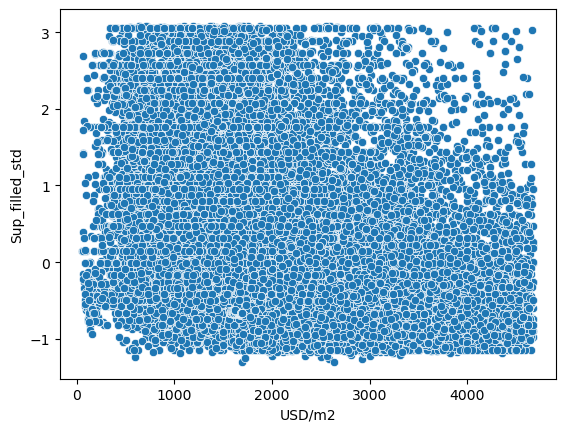

In [717]:
#realizando un scatterplot con sup_filled_std en x y price en y
sns.scatterplot(data=df, x='USD/m2', y='Sup_filled_std')

<AxesSubplot:xlabel='USD/m2', ylabel='rooms'>

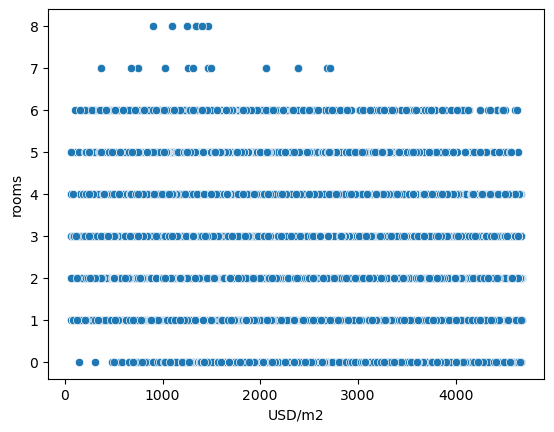

In [718]:
#realizando un scatterplot con sup_filled_std en x y price en y
sns.scatterplot(data=df, x='USD/m2', y='rooms')

In [719]:
#Seleccion de variable predictora y objetivo
X_simple = df[['Sup_filled_std','rooms']]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_simple = linear_model.LinearRegression()

#dividimos en train y test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.25, random_state=1)

lr_simple.fit(X_train_simple, y_train_simple)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_simple.intercept_)
print('Coeficiente: ', lr_simple.coef_)
print('R2 en train: ',lr_simple.score(X_train_simple, y_train_simple))

Intercepto:  [2112.39211231]
Coeficiente:  [[-254.26741094  -25.26337594]]
R2 en train:  0.10096008676940904


In [720]:
#evaluacion de la prediccion del modelo
y_pred_simple = lr_simple.predict(X_test_simple)
print('MAE', metrics.mean_absolute_error(y_test_simple, y_pred_simple))
print('MSE', metrics.mean_squared_error(y_test_simple, y_pred_simple))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_simple, y_pred_simple)))
print('R2', metrics.r2_score(y_test_simple, y_pred_simple))

MAE 643.8262191901409
MSE 660432.240846479
RMSE 812.6698227733567
R2 0.10342534224115962


Se ve un r2 muy bajo en train y en test utilizando solo estas variables

### mismo modelo de regresion simple usando stats models

In [721]:
#hay que agregar explicitamente una constante
X_simple_sm = sm.add_constant(X_simple)
X_train_simple_sm, X_test_simple_sm, y_train_simple_sm, y_test_simple_sm = train_test_split(X_simple_sm, y, test_size=0.25, random_state=1)
sm_simple = sm.OLS(y_train_simple_sm, X_train_simple_sm).fit()
sm_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2791.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:23   Log-Likelihood:            -4.0373e+05
No. Observations:               49704   AIC:                         8.075e+05
Df Residuals:                   49701   BIC:                         8.075e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2112.3921      8.919    236.829      0.000    2094.910    2129.874
Sup_filled_std  -254.2674      4.445    -57.206      0.000    -262.979    -245.556
rooms            -25.2634      3.557     -7.103      0.000     -32.235     -18.292
==============================================================================
Omnibus:                     3195.129   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3843.253
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       3.298   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que le p-value es significativo, por lo cual son variable predictoras importantes y el r2 coincide en 0.10, muy bajo

# Modelos de regresion lineal multiple con categóricas

Haremos distintos modelos con sklearn y smmodels, iremos viendo feature por feature y comparando los puntajes para finalmente utilizar todas

Empezamos con un modelo de regresion multiple que tenga en cuenta el tipo de propiedad

In [722]:
#Seleccion de variable predictora y objetivo
X_mul_pt = df[['property_type_apartment', 'property_type_house', 'property_type_store']]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_pt = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_pt, X_test_mul_pt, y_train_mul_pt, y_test_mul_pt = train_test_split(X_mul_pt, y, test_size=0.25, random_state=1)

lr_mul_pt.fit(X_train_mul_pt, y_train_mul_pt)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_pt.intercept_)
print('Coeficiente: ', lr_mul_pt.coef_)
print('R2 en train: ',lr_mul_pt.score(X_train_mul_pt, y_train_mul_pt))

Intercepto:  [1752.49977207]
Coeficiente:  [[ 591.60033733 -322.16024617  120.74737004]]
R2 en train:  0.22791916008405377


In [723]:
#evaluacion de la prediccion del modelo
y_pred_mul_pt = lr_mul_pt.predict(X_test_mul_pt)
print('MAE', metrics.mean_absolute_error(y_test_mul_pt, y_pred_mul_pt))
print('MSE', metrics.mean_squared_error(y_test_mul_pt, y_pred_mul_pt))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_pt, y_pred_mul_pt)))
print('R2', metrics.r2_score(y_test_mul_pt, y_pred_mul_pt))

MAE 593.149390288018
MSE 568452.9041188766
RMSE 753.9581580690513
R2 0.22829256895580008


Usando stats models


In [724]:

X_mul_pt_sm = sm.add_constant(X_mul_pt)
X_train_mul_pt_sm, X_test_mul_pt_sm, y_train_mul_pt_sm, y_test_mul_pt_sm = train_test_split(X_mul_pt_sm, y, test_size=0.25, random_state=1)
sm_mul_pt_sm = sm.OLS(y_train_mul_pt_sm, X_train_mul_pt_sm).fit()
sm_mul_pt_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     4890.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:23   Log-Likelihood:            -3.9995e+05
No. Observations:               49704   AIC:                         7.999e+05
Df Residuals:                   49700   BIC:                         7.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1752.4998     13.850    126.531      0.000    1725.353    1779.647
property_type_apartment   591.6003     14.465     40.900      0.000     563.250     619.951
property_type_house      -322.1602     15.279    -21.086      0.000    -352.106    -292.214
property_type_store       120.7474     60.967      1.981      0.048       1.251     240.244
==============================================================================
Omnibus:                     2364.777   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.198
Skew:                           0.541   Prob(JB):                         0.00
Kurtosis:                       3.393   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value significativo para departamento y casa pero no así para "negocio"


In [725]:
#Seleccion de variable predictora y objetivo
X_mul_reg = df[['Region 2', 'Region 3']]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_reg = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_reg, X_test_mul_reg, y_train_mul_reg, y_test_mul_reg = train_test_split(X_mul_reg, y, test_size=0.25, random_state=1)

lr_mul_reg.fit(X_train_mul_reg, y_train_mul_reg)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_reg.intercept_)
print('Coeficiente: ', lr_mul_reg.coef_)
print('R2 en train: ',lr_mul_reg.score(X_train_mul_reg, y_train_mul_reg))

Intercepto:  [2643.35785579]
Coeficiente:  [[ -643.73081761 -1087.25943513]]
R2 en train:  0.27199321461785775


In [726]:
#evaluacion de la prediccion del modelo
y_pred_mul_reg = lr_mul_reg.predict(X_test_mul_reg)
print('MAE', metrics.mean_absolute_error(y_test_mul_reg, y_pred_mul_reg))
print('MSE', metrics.mean_squared_error(y_test_mul_reg, y_pred_mul_reg))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_reg, y_pred_mul_reg)))
print('R2', metrics.r2_score(y_test_mul_reg, y_pred_mul_reg))

MAE 573.3202772679915
MSE 538794.5978823807
RMSE 734.0262923645042
R2 0.2685554212502481


Usando stats models


In [727]:

X_mul_reg_sm = sm.add_constant(X_mul_reg)
X_train_mul_reg_sm, X_test_mul_reg_sm, y_train_mul_reg_sm, y_test_mul_reg_sm = train_test_split(X_mul_reg_sm, y, test_size=0.25, random_state=1)
sm_mul_reg_sm = sm.OLS(y_train_mul_reg_sm, X_train_mul_reg_sm).fit()
sm_mul_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     9284.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:24   Log-Likelihood:            -3.9848e+05
No. Observations:               49704   AIC:                         7.970e+05
Df Residuals:                   49701   BIC:                         7.970e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2643.3579      5.758    459.045      0.000    2632.071    2654.644
Region 2    -643.7308      8.164    -78.848      0.000    -659.733    -627.729
Region 3   -1087.2594      8.008   -135.775      0.000   -1102.955   -1071.564
==============================================================================
Omnibus:                     2596.534   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3131.504
Skew:                           0.552   Prob(JB):                         0.00
Kurtosis:                       3.541   Cond. No.                         3.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value significativo para ambas regiones


### Regresion lineal multiple usando variables obtenidas en el TP1 (sin amenities)

In [728]:
X_mul_rsp = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',]]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_rsp = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_rsp, X_test_mul_rsp, y_train_mul_rsp, y_test_mul_rsp = train_test_split(X_mul_rsp, y, test_size=0.25, random_state=1)

lr_mul_rsp.fit(X_train_mul_rsp, y_train_mul_rsp)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_rsp.intercept_)
print('Coeficiente: ', lr_mul_rsp.coef_)
print('R2 en train: ',lr_mul_rsp.score(X_train_mul_rsp, y_train_mul_rsp))

Intercepto:  [1833.68879635]
Coeficiente:  [[ -28.54582921   26.97954769  578.46641055 -347.71918425   71.44355824]]
R2 en train:  0.22907851072096486


In [729]:
#evaluacion de la prediccion del modelo
y_pred_mul_rsp = lr_mul_rsp.predict(X_test_mul_rsp)
print('MAE', metrics.mean_absolute_error(y_test_mul_rsp, y_pred_mul_rsp))
print('MSE', metrics.mean_squared_error(y_test_mul_rsp, y_pred_mul_rsp))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_rsp, y_pred_mul_rsp)))
print('R2', metrics.r2_score(y_test_mul_rsp, y_pred_mul_rsp))

MAE 592.6888106736029
MSE 568539.0148806028
RMSE 754.0152617027077
R2 0.2281756686563461


In [730]:
#hay que agregar explicitamente una constante
X_mul_rsp_sm = sm.add_constant(X_mul_rsp)
X_train_mul_rsp_sm, X_test_mul_rsp_sm, y_train_mul_rsp_sm, y_test_mul_rsp_sm = train_test_split(X_mul_rsp_sm, y, test_size=0.25, random_state=1)
sm_mul_rsp_sm = sm.OLS(y_train_mul_rsp_sm, X_train_mul_rsp_sm).fit()
sm_mul_rsp_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2954.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:24   Log-Likelihood:            -3.9991e+05
No. Observations:               49704   AIC:                         7.998e+05
Df Residuals:                   49698   BIC:                         7.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1833.6888     16.747    109.491      0.000    1800.864    1866.514
rooms                     -28.5458      3.332     -8.568      0.000     -35.076     -22.016
Sup_filled_std             26.9795      5.297      5.093      0.000      16.597      37.362
property_type_apartment   578.4664     14.661     39.456      0.000     549.730     607.202
property_type_house      -347.7192     16.386    -21.220      0.000    -379.836    -315.602
property_type_store        71.4436     61.230      1.167      0.243     -48.567     191.454
==============================================================================
Omnibus:                     2441.434   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.979
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                       3.414   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [731]:
#hay que agregar explicitamente una constante
X_mul_rsp_sm = sm.add_constant(X_mul_rsp)
X_train_mul_rsp_sm, X_test_mul_rsp_sm, y_train_mul_rsp_sm, y_test_mul_rsp_sm = train_test_split(X_mul_rsp_sm, y, test_size=0.25, random_state=1)
sm_mul_rsp_sm = sm.OLS(y_train_mul_rsp_sm, X_train_mul_rsp_sm).fit()
sm_mul_rsp_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2954.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:24   Log-Likelihood:            -3.9991e+05
No. Observations:               49704   AIC:                         7.998e+05
Df Residuals:                   49698   BIC:                         7.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1833.6888     16.747    109.491      0.000    1800.864    1866.514
rooms                     -28.5458      3.332     -8.568      0.000     -35.076     -22.016
Sup_filled_std             26.9795      5.297      5.093      0.000      16.597      37.362
property_type_apartment   578.4664     14.661     39.456      0.000     549.730     607.202
property_type_house      -347.7192     16.386    -21.220      0.000    -379.836    -315.602
property_type_store        71.4436     61.230      1.167      0.243     -48.567     191.454
==============================================================================
Omnibus:                     2441.434   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.979
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                       3.414   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se ve más aún la poca ingerencia que tiene en la prediccion el property store

Se agrega la región

In [732]:
### Regresion multiple con rooms, sup_Filled,rooms, property type y region
X_mul_rsps = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3' ]]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_rsps = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_rsps, X_test_mul_rsps, y_train_mul_rsps, y_test_mul_rsps = train_test_split(X_mul_rsps, y, test_size=0.25, random_state=1)

lr_mul_rsps.fit(X_train_mul_rsps, y_train_mul_rsps)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_rsps.intercept_)
print('Coeficiente: ', lr_mul_rsps.coef_)
print('R2 en train: ',lr_mul_rsps.score(X_train_mul_rsps, y_train_mul_rsps))

Intercepto:  [2262.21327094]
Coeficiente:  [[ -38.78614265  -15.01452415  525.55923776  -80.98570074  145.41226009
  -417.43496895 -883.43829509]]
R2 en train:  0.3900839827020639


In [733]:
#evaluacion de la prediccion del modelo
y_pred_mul_rsps = lr_mul_rsps.predict(X_test_mul_rsps)
print('MAE', metrics.mean_absolute_error(y_test_mul_rsps, y_pred_mul_rsps))
print('MSE', metrics.mean_squared_error(y_test_mul_rsps, y_pred_mul_rsps))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_rsps, y_pred_mul_rsps)))
print('R2', metrics.r2_score(y_test_mul_rsps, y_pred_mul_rsps))

MAE 513.753623312738
MSE 450240.54234236776
RMSE 670.9996589733618
R2 0.38877263223495584


In [734]:
#usando stats models
X_mul_rsps = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3' ]]
y = df[['USD/m2']].values
#hay que agregar explicitamente una constante
X_mul_rsps_sm = sm.add_constant(X_mul_rsps)
X_train_mul_rsps_sm, X_test_mul_rsps_sm, y_train_mul_rsps_sm, y_test_mul_rsps_sm = train_test_split(X_mul_rsps_sm, y, test_size=0.25, random_state=1)
sm_mul_rsps_sm = sm.OLS(y_train_mul_rsps_sm, X_train_mul_rsps_sm).fit()
sm_mul_rsps_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4541.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:            -3.9409e+05
No. Observations:               49704   AIC:                         7.882e+05
Df Residuals:                   49696   BIC:                         7.883e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2262.2133     15.540    145.578      0.000    2231.756    2292.671
rooms                     -38.7861      2.965    -13.081      0.000     -44.598     -32.975
Sup_filled_std            -15.0145      4.732     -3.173      0.002     -24.289      -5.740
property_type_apartment   525.5592     13.051     40.269      0.000     499.979     551.140
property_type_house       -80.9857     14.784     -5.478      0.000    -109.963     -52.009
property_type_store       145.4123     54.468      2.670      0.008      38.654     252.171
Region 2                 -417.4350      7.880    -52.974      0.000    -432.880    -401.990
Region 3                 -883.4383      7.755   -113.918      0.000    -898.638    -868.238
==============================================================================
Omnibus:                     3656.022   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5297.119
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                       4.027   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al utilizar todas las variables la la variable "negocio" deja de tener un p-value tan alto

Se realiza un modelo solo con los amenities

In [735]:
### Regresion multiple con rooms, sup_Filled,rooms, property type y state_name
X_mul_a = df[['pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'laundry', 'sum', 'grupo electrógeno',
       'solarium' ]]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_a = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_a, X_test_mul_a, y_train_mul_a, y_test_mul_a = train_test_split(X_mul_a, y, test_size=0.25, random_state=1)

lr_mul_a.fit(X_train_mul_a, y_train_mul_a)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_a.intercept_)
print('Coeficiente: ', lr_mul_a.coef_)
print('R2 en train: ',lr_mul_a.score(X_train_mul_a, y_train_mul_a))

Intercepto:  [1877.28278629]
Coeficiente:  [[  23.97649129  369.79476234   75.79632668  291.14560226   76.20008593
  -108.35042808 -318.59046681  -11.10376945 -342.12206518  344.37550042
   193.49795008  198.40452716  240.89935466]]
R2 en train:  0.1978387343007294


In [736]:
#evaluacion de la prediccion del modelo
y_pred_mul_a = lr_mul_a.predict(X_test_mul_a)
print('MAE', metrics.mean_absolute_error(y_test_mul_a, y_pred_mul_a))
print('MSE', metrics.mean_squared_error(y_test_mul_a, y_pred_mul_a))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_a, y_pred_mul_a)))
print('R2', metrics.r2_score(y_test_mul_a, y_pred_mul_a))

MAE 599.9624611577916
MSE 590623.9795856035
RMSE 768.5206435650272
R2 0.1981940619942859


In [737]:
#hay que agregar explicitamente una constante
X_mul_a_sm = sm.add_constant(X_mul_a)
X_train_mul_a_sm, X_test_mul_a_sm, y_train_mul_a_sm, y_test_mul_a_sm = train_test_split(X_mul_a_sm, y, test_size=0.25, random_state=1)
sm_mul_a_sm = sm.OLS(y_train_mul_a_sm, X_train_mul_a_sm).fit()
sm_mul_a_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     942.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:            -4.0090e+05
No. Observations:               49704   AIC:                         8.018e+05
Df Residuals:                   49690   BIC:                         8.019e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1877.2828      6.278    299.004      0.000    1864.977    1889.589
pileta               23.9765      9.966      2.406      0.016       4.444      43.509
gimnasio            369.7948     15.621     23.673      0.000     339.178     400.412
terraza              75.7963      8.348      9.080      0.000      59.434      92.158
balcón              291.1456      7.457     39.043      0.000     276.530     305.761
cochera              76.2001      7.283     10.463      0.000      61.925      90.475
jardín             -108.3504     10.586    -10.235      0.000    -129.099     -87.602
patio              -318.5905      9.144    -34.841      0.000    -336.513    -300.668
parrilla            -11.1038      8.586     -1.293      0.196     -27.933       5.725
quincho            -342.1221     12.684    -26.973      0.000    -366.983    -317.261
laundry             344.3755     15.860     21.714      0.000     313.290     375.461
sum                 193.4980     11.490     16.840      0.000     170.977     216.019
grupo electrógeno   198.4045     30.746      6.453      0.000     138.142     258.667
solarium            240.8994     14.286     16.863      0.000     212.899     268.899
==============================================================================
Omnibus:                     2671.898   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3158.515
Skew:                           0.580   Prob(JB):                         0.00
Kurtosis:                       3.422   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [738]:
### Regresion multiple con rooms, sup_Filled,rooms, property type y state_name
X_mul_tot = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3','pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'laundry', 'sum', 'grupo electrógeno',
       'solarium' ]]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_tot = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_tot, X_test_mul_tot, y_train_mul_tot, y_test_mul_tot = train_test_split(X_mul_tot, y, test_size=0.25, random_state=1)

lr_mul_tot.fit(X_train_mul_tot, y_train_mul_tot)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_tot.intercept_)
print('Coeficiente: ', lr_mul_tot.coef_)
print('R2 en train: ',lr_mul_tot.score(X_train_mul_tot, y_train_mul_tot))

Intercepto:  [2156.39002254]
Coeficiente:  [[ -16.0651996   -84.35687755  345.03038703 -143.05199883  202.39676763
  -471.40170975 -857.65800652  210.43526886  267.09025962   79.02248489
    55.28394703  178.43485954   97.46703385 -129.18909803   57.01810746
   -68.20103435    5.60060981    9.73394019  117.17801074    3.85778258]]
R2 en train:  0.45132706326535366


In [739]:
#evaluacion de la prediccion del modelo
y_pred_mul_tot = lr_mul_tot.predict(X_test_mul_tot)
print('MAE', metrics.mean_absolute_error(y_test_mul_tot, y_pred_mul_tot))
print('MSE', metrics.mean_squared_error(y_test_mul_tot, y_pred_mul_tot))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_tot, y_pred_mul_tot)))
print('R2', metrics.r2_score(y_test_mul_tot, y_pred_mul_tot))

MAE 483.9620992706216
MSE 403820.2035568257
RMSE 635.4684913957777
R2 0.45179090539853306


In [740]:
#hay que agregar explicitamente una constante
X_mul_tot_sm = sm.add_constant(X_mul_tot)
X_train_mul_tot_sm, X_test_mul_tot_sm, y_train_mul_tot_sm, y_test_mul_tot_sm = train_test_split(X_mul_tot_sm, y, test_size=0.25, random_state=1)
sm_mul_tot_sm = sm.OLS(y_train_mul_tot_sm, X_train_mul_tot_sm).fit()
sm_mul_tot_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2043.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:26   Log-Likelihood:            -3.9146e+05
No. Observations:               49704   AIC:                         7.830e+05
Df Residuals:                   49683   BIC:                         7.831e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2156.3900     15.745    136.959      0.000    2125.530    2187.250
rooms                     -16.0652      2.864     -5.609      0.000     -21.679     -10.451
Sup_filled_std            -84.3569      4.697    -17.960      0.000     -93.563     -75.151
property_type_apartment   345.0304     13.227     26.084      0.000     319.105     370.956
property_type_house      -143.0520     14.405     -9.931      0.000    -171.285    -114.819
property_type_store       202.3968     51.783      3.909      0.000     100.901     303.892
Region 2                 -471.4017      7.682    -61.367      0.000    -486.458    -456.346
Region 3                 -857.6580      7.635   -112.334      0.000    -872.622    -842.694
pileta                    210.4353      8.454     24.891      0.000     193.865     227.006
gimnasio                  267.0903     13.012     20.526      0.000     241.586     292.595
terraza                    79.0225      6.975     11.329      0.000      65.351      92.694
balcón                     55.2839      6.577      8.406      0.000      42.393      68.175
cochera                   178.4349      6.109     29.206      0.000     166.460     190.409
jardín                     97.4670      9.082     10.732      0.000      79.666     115.268
patio                    -129.1891      7.973    -16.204      0.000    -144.815    -113.563
parrilla                   57.0181      7.415      7.690      0.000      42.485      71.552
quincho                   -68.2010     10.730     -6.356      0.000     -89.233     -47.169
laundry                     5.6006     13.400      0.418      0.676     -20.664      31.865
sum                         9.7339      9.606      1.013      0.311      -9.094      28.562
grupo electrógeno         117.1780     25.469      4.601      0.000      67.258     167.098
solarium                    3.8578     12.006      0.321      0.748     -19.673      27.389
==============================================================================
Omnibus:                     3839.526   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6332.628
Skew:                           0.589   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                         54.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando todas las variables se ve que laundry sum y solarium no presentan un p-value bajo por lo que se quitan en el modelo final

In [741]:
### Regresion multiple con rooms, sup_Filled,rooms, property type y state_name
X_mul_tot = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3','pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'grupo electrógeno']]
y = df[['USD/m2']].values

#instanciamos el modelo
lr_mul_tot = linear_model.LinearRegression()

#dividimos en train y test
X_train_mul_tot, X_test_mul_tot, y_train_mul_tot, y_test_mul_tot = train_test_split(X_mul_tot, y, test_size=0.25, random_state=1)

lr_mul_tot.fit(X_train_mul_tot, y_train_mul_tot)

#imprimos los atributos obtenidos
print('Intercepto: ', lr_mul_tot.intercept_)
print('Coeficiente: ', lr_mul_tot.coef_)
print('R2 en train: ',lr_mul_tot.score(X_train_mul_tot, y_train_mul_tot))

Intercepto:  [2157.43386821]
Coeficiente:  [[ -16.2885309   -85.0211082   345.61946841 -143.16253662  202.96540936
  -472.56642519 -859.1283946   213.31826075  271.88799165   79.4379017
    55.38282873  179.29512335   97.52909485 -129.24916407   58.99868187
   -68.61623654  119.01018531]]
R2 en train:  0.4513087071341074


In [742]:
#evaluacion de la prediccion del modelo
y_pred_mul_tot = lr_mul_tot.predict(X_test_mul_tot)
print('MAE', metrics.mean_absolute_error(y_test_mul_tot, y_pred_mul_tot))
print('MSE', metrics.mean_squared_error(y_test_mul_tot, y_pred_mul_tot))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_mul_tot, y_pred_mul_tot)))
print('R2', metrics.r2_score(y_test_mul_tot, y_pred_mul_tot))

MAE 484.0596044579308
MSE 403843.95804453164
RMSE 635.4871816524167
R2 0.4517586573186121


In [743]:
#hay que agregar explicitamente una constante
X_mul_tot_sm = sm.add_constant(X_mul_tot)
X_train_mul_tot_sm, X_test_mul_tot_sm, y_train_mul_tot_sm, y_test_mul_tot_sm = train_test_split(X_mul_tot_sm, y, test_size=0.25, random_state=1)
sm_mul_tot_sm = sm.OLS(y_train_mul_tot_sm, X_train_mul_tot_sm).fit()
sm_mul_tot_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2404.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:27   Log-Likelihood:            -3.9146e+05
No. Observations:               49704   AIC:                         7.830e+05
Df Residuals:                   49686   BIC:                         7.831e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2157.4339     15.716    137.272      0.000    2126.629    2188.238
rooms                     -16.2885      2.852     -5.711      0.000     -21.878     -10.699
Sup_filled_std            -85.0211      4.665    -18.227      0.000     -94.164     -75.878
property_type_apartment   345.6195     13.212     26.159      0.000     319.724     371.515
property_type_house      -143.1625     14.399     -9.943      0.000    -171.385    -114.941
property_type_store       202.9654     51.779      3.920      0.000     101.477     304.454
Region 2                 -472.5664      7.575    -62.381      0.000    -487.414    -457.718
Region 3                 -859.1284      7.516   -114.307      0.000    -873.860    -844.397
pileta                    213.3183      8.046     26.512      0.000     197.548     229.089
gimnasio                  271.8880     12.285     22.132      0.000     247.810     295.966
terraza                    79.4379      6.962     11.409      0.000      65.791      93.084
balcón                     55.3828      6.576      8.422      0.000      42.494      68.272
cochera                   179.2951      6.073     29.525      0.000     167.393     191.198
jardín                     97.5291      9.079     10.742      0.000      79.734     115.324
patio                    -129.2492      7.972    -16.212      0.000    -144.875    -113.623
parrilla                   58.9987      7.212      8.181      0.000      44.863      73.134
quincho                   -68.6162     10.716     -6.403      0.000     -89.620     -47.613
grupo electrógeno         119.0102     25.310      4.702      0.000      69.402     168.618
==============================================================================
Omnibus:                     3840.769   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6324.719
Skew:                           0.590   Prob(JB):                         0.00
Kurtosis:                       4.289   Cond. No.                         54.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regularización

De todos los modelos de regresion, el que mejores métricas tiene el último. Para verificar en el ultimo modelo el descarte de las variables anteriores por p-values altos, se elige lasso como modelo de regularizacion para descartar features inútiles

In [744]:
#creamos x e y
X_lasso = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3','pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'laundry', 'sum', 'grupo electrógeno',
       'solarium' ]]
y = df[['USD/m2']].values


In [745]:
#instanciamos el modelo
lm_lasso = linear_model.LassoCV(alphas =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000], cv = 5)

In [746]:
#hacemos train test split
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.25, random_state=1)

In [747]:
#entrenamos el modelo
lasso_fit = lm_lasso.fit(X_train_lasso, y_train_lasso.ravel())
lasso_fit.alpha_

0.1

In [748]:
lasso_fit.score(X_train_lasso, y_train_lasso)

0.45132090014942705

In [749]:
#instanciamos el modelo
lm_lasso = linear_model.LassoCV(alphas =[0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13], cv = 5)

In [750]:
#hacemos train test split
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.25, random_state=1)

In [751]:
#entrenamos el modelo
lasso_fit = lm_lasso.fit(X_train_lasso, y_train_lasso.ravel())
lasso_fit.alpha_

0.07

In [752]:
lasso_fit.score(X_train_lasso, y_train_lasso)

0.45132404320485897

El cambio no es muy grande se mantiene el valor

In [753]:
lasso_predict = lasso_fit.predict(X_test_lasso)

In [754]:
#imprimos los atributos obtenidos
print('Intercepto: ', lasso_fit.intercept_)
print('Coeficiente: ', lasso_fit.coef_)
print('R2 en train: ',lasso_fit.score(X_train_lasso, y_train_lasso))

Intercepto:  2157.6625700204377
Coeficiente:  [ -16.19470701  -84.15434282  344.08027597 -144.15146608  179.50965005
 -470.78595824 -857.2295695   210.3640628   266.6512672    78.76552038
   55.24586745  178.25515422   96.78128493 -128.96036766   56.83001223
  -67.31013622    5.33327792    9.79850868  112.38046394    3.7835378 ]
R2 en train:  0.45132404320485897


In [755]:
#evaluacion de la prediccion del modelo
y_pred_lasso = lasso_fit.predict(X_test_lasso)
print('MAE', metrics.mean_absolute_error(y_test_lasso, y_pred_lasso))
print('MSE', metrics.mean_squared_error(y_test_lasso, y_pred_lasso))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_lasso, y_pred_lasso)))
print('R2', metrics.r2_score(y_test_lasso, y_pred_lasso))

MAE 483.97388863910635
MSE 403854.4598941192
RMSE 635.4954444322314
R2 0.4517444004552771


In [756]:
#stats models
X_lasso_sm = sm.add_constant(X_lasso)
X_train_lasso_sm, X_lasso_sm, y_train_lasso_sm, y_test_lasso_sm = train_test_split(X_lasso_sm, y, test_size=0.25, random_state=1)
sm_lasso_noreg = sm.OLS(y_train_lasso_sm, X_train_lasso_sm)
sm_lasso_reg = sm_lasso_noreg.fit_regularized(alpha= lasso_fit.alpha_, L1_wt=1)
sm_lasso_reg.params

const                      2169.338364
rooms                       -16.398765
Sup_filled_std              -83.871518
property_type_apartment     335.265578
property_type_house        -152.057888
property_type_store         170.222178
Region 2                   -472.749981
Region 3                   -859.021598
pileta                      210.375246
gimnasio                    267.237465
terraza                      78.087492
balcón                       54.508880
cochera                     178.054351
jardín                       96.437674
patio                      -131.167542
parrilla                     56.158227
quincho                     -67.807613
laundry                       5.043961
sum                           9.456962
grupo electrógeno           112.321529
solarium                      3.846611
dtype: float64

Se ven que los coeficientes para las variables mencioandas antes son cercanos a 0

Por ultimo se realiza un modelo de Ridge con las variables descartadas por p-value y por lasso:

In [757]:
#creamos x e y
X_ridge = df[['rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3','pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'grupo electrógeno']]
y = df[['USD/m2']].values


In [758]:
#instanciamos el modelo
lm_ridge = linear_model.RidgeCV(alphas =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000], cv = 5)

In [759]:
#hacemos train test split
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y, test_size=0.25, random_state=1)

In [760]:
#entrenamos el modelo
ridge_fit = lm_ridge.fit(X_train_ridge, y_train_ridge.ravel())
ridge_fit.alpha_

10.0

In [761]:
ridge_fit.score(X_train_ridge, y_train_ridge)

0.45130737010607946

In [762]:
#instanciamos el modelo
lm_ridge = linear_model.RidgeCV(alphas =[7, 8, 9, 10, 11, 12, 13], cv = 5)
ridge_fit.alpha_

10.0

In [763]:
#hacemos train test split
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y, test_size=0.25, random_state=1)

In [764]:
#entrenamos el modelo
ridge_fit = lm_ridge.fit(X_train_ridge, y_train_ridge.ravel())

In [765]:
ridge_fit.score(X_train_ridge, y_train_ridge)

0.4513078390067101

El cambio no es muy grande se mantiene el valor

In [766]:
ridge_predict = ridge_fit.predict(X_test_ridge)

In [767]:
#imprimos los atributos obtenidos
print('Intercepto: ', ridge_fit.intercept_)
print('Coeficiente: ', ridge_fit.coef_)
print('R2 en train: ',ridge_fit.score(X_train_ridge, y_train_ridge))

Intercepto:  2158.0750381868243
Coeficiente:  [ -16.35249334  -84.93210766  344.52836062 -144.51562962  192.21855242
 -471.57750647 -857.97859433  213.25802255  271.45423314   79.36037561
   55.51707394  179.16450794   97.36123079 -129.32625565   59.10848408
  -68.59340437  117.91140568]
R2 en train:  0.4513078390067101


In [768]:
#evaluacion de la prediccion del modelo
y_pred_ridge = ridge_fit.predict(X_test_ridge)
print('MAE', metrics.mean_absolute_error(y_test_ridge, y_pred_ridge))
print('MSE', metrics.mean_squared_error(y_test_ridge, y_pred_ridge))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_ridge, y_pred_ridge)))
print('R2', metrics.r2_score(y_test_ridge, y_pred_ridge))

MAE 484.0663689656994
MSE 403855.0628153592
RMSE 635.4959188030708
R2 0.45174358195510245


In [769]:
#stats models
X_ridge_sm = sm.add_constant(X_ridge)
X_train_ridge_sm, X_ridge_sm, y_train_ridge_sm, y_test_ridge_sm = train_test_split(X_ridge_sm, y, test_size=0.25, random_state=1)
sm_ridge_noreg = sm.OLS(y_train_ridge_sm, X_train_ridge_sm)
sm_ridge_reg = sm_ridge_noreg.fit_regularized(alpha= ridge_fit.alpha_, L1_wt=0)
sm_ridge_reg.params

array([141.20253302, 252.90656213, -47.92933653, 119.18864721,
        15.40010166,   0.52222636,  41.2868488 ,  28.65686086,
        39.88372125,  17.26371122,  38.25188544,  71.71518432,
        66.05366941,  15.73761403,  16.30528798,  43.06725834,
         7.34754386,   2.92066869])

In [770]:
variables=np.array(['const','rooms', 'Sup_filled_std', 'property_type_apartment', 'property_type_house','property_type_store',
       'Region 2', 'Region 3','pileta', 'gimnasio', 'terraza', 'balcón', 'cochera', 'jardín',
       'patio', 'parrilla', 'quincho', 'grupo electrógeno'])
aux=pd.DataFrame(sm_ridge_reg.params)

In [771]:
aux.index=variables

In [772]:
aux

,0
const,141.202533
rooms,252.906562
Sup_filled_std,-47.929337
property_type_apartment,119.188647
property_type_house,15.400102
property_type_store,0.522226
Region 2,41.286849
Region 3,28.656861
pileta,39.883721
gimnasio,17.263711


En terminos de métricas, este último modelo es muy similar al anterior

<function matplotlib.pyplot.show(close=None, block=None)>

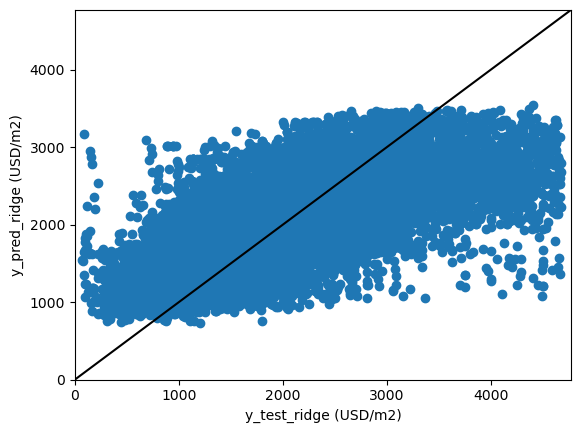

In [808]:
plt.scatter(x=y_test_ridge, y=y_pred_ridge)
plt.xlabel('y_test_ridge (USD/m2)')
plt.ylabel('y_pred_ridge (USD/m2)')
plt.xlim(0,max(y_test_ridge)*1.02)
plt.ylim(0,max(y_test_ridge)*1.02)

x1, y1 = [0, max(y_test_ridge)*1.02], [0, max(y_test_ridge)*1.02]
plt.plot(x1,y1,color='black')
plt.show